In [1]:
from google.colab import drive
import cv2
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Provide the paths to your left and right images
left_image_path = '/content/drive/MyDrive/Project1/l1.png'
right_image_path = '/content/drive/MyDrive/Project1/r1.png'
left_image_path2 = '/content/drive/MyDrive/Project1/l2.png'
right_image_path2 = '/content/drive/MyDrive/Project1/r2.png'
left_image_path3 = '/content/drive/MyDrive/Project1/l3.png'
right_image_path3 = '/content/drive/MyDrive/Project1/r3.png'

left_image = cv2.imread(left_image_path)
right_image = cv2.imread(right_image_path)
left_image2 = cv2.imread(left_image_path2)
right_image2 = cv2.imread(right_image_path2)
left_image3 = cv2.imread(left_image_path3)
right_image3 = cv2.imread(right_image_path3)

left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)
left_gray2 = cv2.cvtColor(left_image2, cv2.COLOR_BGR2GRAY)
right_gray2 = cv2.cvtColor(right_image2, cv2.COLOR_BGR2GRAY)
left_gray3 = cv2.cvtColor(left_image3, cv2.COLOR_BGR2GRAY)
right_gray3 = cv2.cvtColor(right_image3, cv2.COLOR_BGR2GRAY)

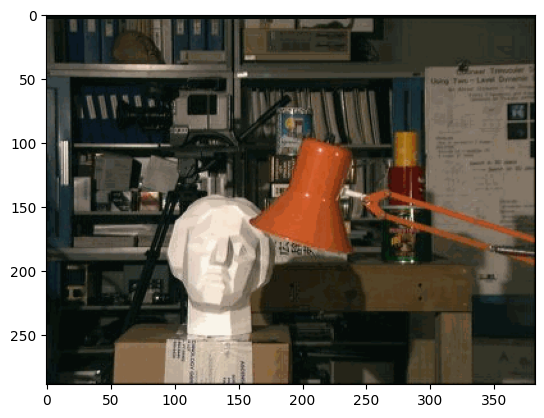

In [3]:
plt.imshow(cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB))

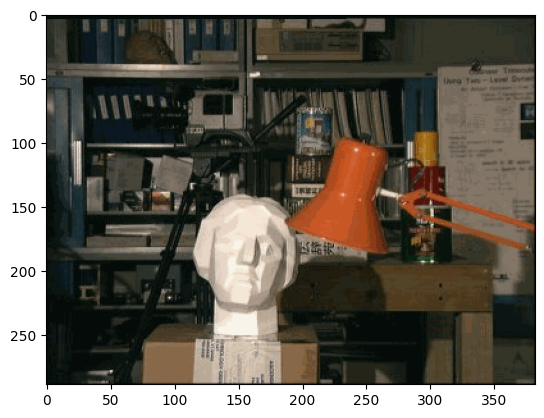

In [4]:
plt.imshow(cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB))

In [16]:
import numpy as np

def pad_image(image, pad_size):
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)
    return padded_image

def block_matching(left_image, right_image, window_size, block_type):
    height, width = left_image.shape
    disparity_map = np.zeros_like(left_image, dtype=np.float32)

    # Pad images
    left_image_padded = pad_image(left_image, window_size // 2)
    right_image_padded = pad_image(right_image, window_size // 2)

    for i in range(height):
        for j in range(width):
            min_val = np.inf
            disparity = 0

            # Iterate through every pixel in the same row of the right image
            for pixel in range(width):
                if block_type == "SAD":
                    block_diff = np.sum(np.abs(left_image_padded[i:i+window_size, j:j+window_size] -
                                               right_image_padded[i:i+window_size, pixel:pixel+window_size]))
                elif block_type == "SSD":
                    block_diff = np.sum((left_image_padded[i:i+window_size, j:j+window_size] -
                                         right_image_padded[i:i+window_size, pixel:pixel+window_size]) ** 2)

                if block_diff < min_val:
                    min_val = block_diff
                    disparity = abs(j - pixel)
            disparity_map[i, j] = disparity

    return disparity_map

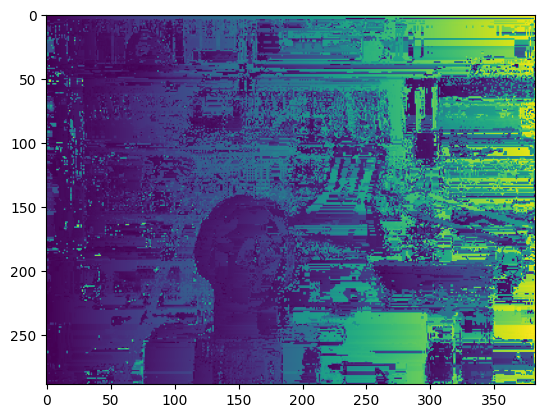

In [17]:
SAD_map_window_1 = block_matching(left_gray, right_gray, 1, "SAD")
plt.imshow(SAD_map_window_1)

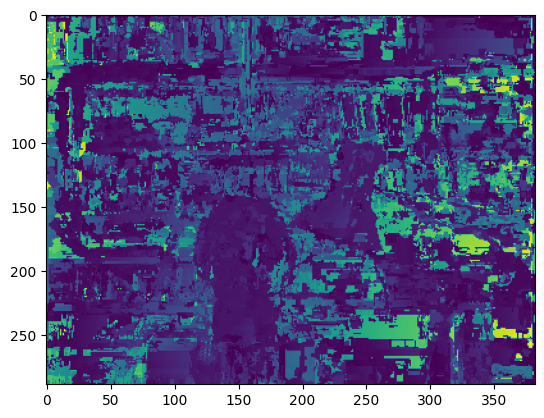

In [18]:
SAD_map_window_5 = block_matching(left_gray, right_gray, 5, "SAD")
plt.imshow(SAD_map_window_5)

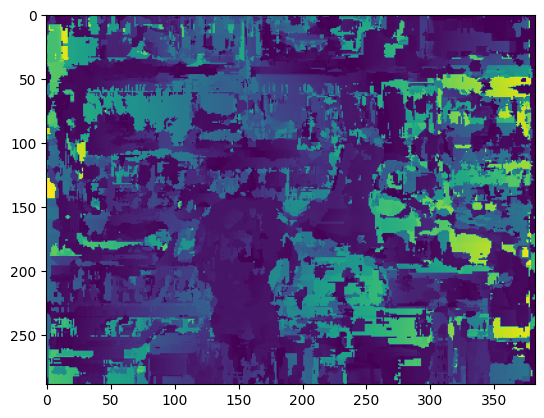

In [19]:
SAD_map_window_9 = block_matching(left_gray, right_gray, 9, "SAD")
plt.imshow(SAD_map_window_9)

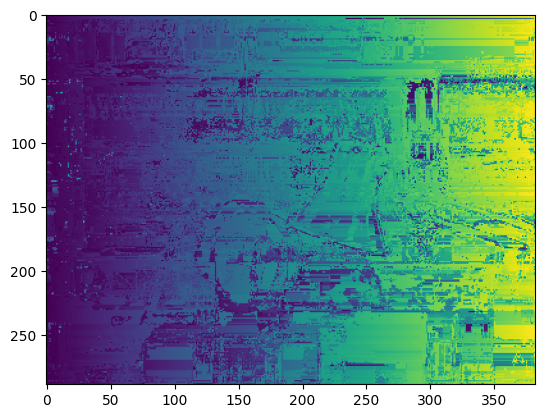

In [20]:
SSD_map_window_1 = block_matching(left_gray, right_gray, 1, "SSD")
plt.imshow(SSD_map_window_1)

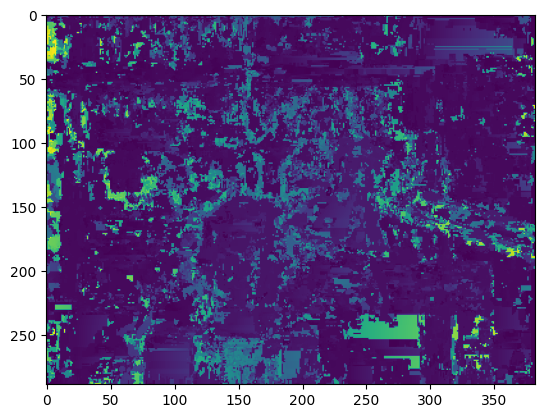

In [21]:
SSD_map_window_5 = block_matching(left_gray, right_gray, 5, "SSD")
plt.imshow(SSD_map_window_5)

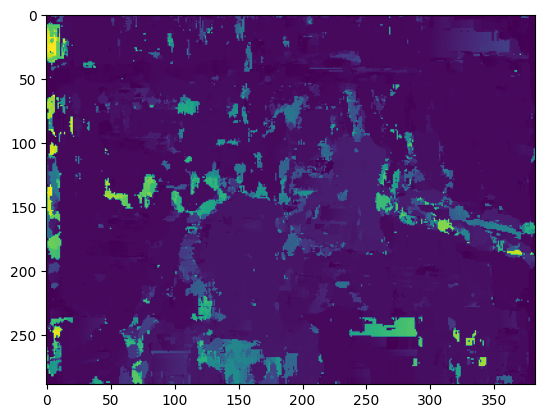

In [22]:
SSD_map_window_9 = block_matching(left_gray, right_gray, 9, "SSD")
plt.imshow(SSD_map_window_9)

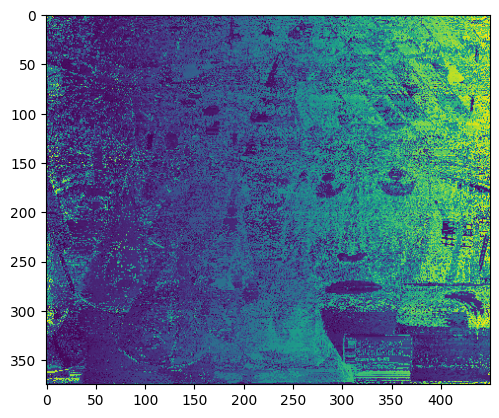

In [23]:
SAD_map_window_1 = block_matching(left_gray2, right_gray2, 1, "SAD")
plt.imshow(SAD_map_window_1)

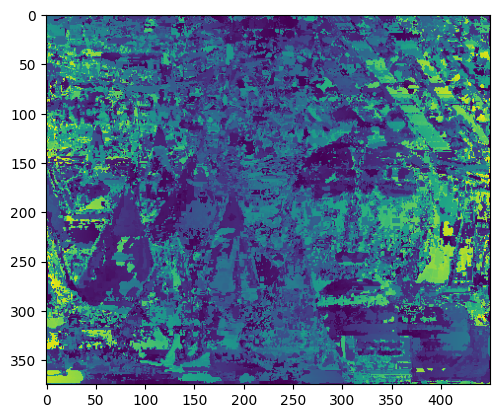

In [24]:
SAD_map_window_5 = block_matching(left_gray2, right_gray2, 5, "SAD")
plt.imshow(SAD_map_window_5)

In [ ]:
SAD_map_window_9 = block_matching(left_gray2, right_gray2, 9, "SAD")
plt.imshow(SAD_map_window_9)

In [ ]:
SSD_map_window_1 = block_matching(left_gray2, right_gray2, 1, "SSD")
plt.imshow(SSD_map_window_1)

In [ ]:
SSD_map_window_5 = block_matching(left_gray2, right_gray2, 5, "SSD")
plt.imshow(SSD_map_window_5)

In [ ]:
SSD_map_window_9 = block_matching(left_gray2, right_gray2, 9, "SSD")
plt.imshow(SSD_map_window_9)

In [ ]:
SAD_map_window_1 = block_matching(left_gray3, right_gray3, 1, "SAD")
plt.imshow(SAD_map_window_1)

In [ ]:
SAD_map_window_5 = block_matching(left_gray3, right_gray3, 5, "SAD")
plt.imshow(SAD_map_window_5)

In [ ]:
SAD_map_window_9 = block_matching(left_gray3, right_gray3, 9, "SAD")
plt.imshow(SAD_map_window_9)

In [ ]:
SSD_map_window_1 = block_matching(left_gray3, right_gray3, 1, "SSD")
plt.imshow(SSD_map_window_1)

In [ ]:
SSD_map_window_5 = block_matching(left_gray3, right_gray3, 5, "SSD")
plt.imshow(SSD_map_window_5)

In [ ]:
SSD_map_window_9 = block_matching(left_gray3, right_gray3, 9, "SSD")
plt.imshow(SSD_map_window_9)